In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv('tracks_cleaned.csv')

correlation, p_value = stats.pearsonr(df['loudness'], df['popularity'])

print(f"Correlation Score (r): {correlation:.4f}")
print(f"P-Value: {p_value:.4e}")

Correlation Score (r): 0.2086
P-Value: 3.1842e-78


In [ ]:

df['Loudness_Bucket'] = pd.qcut(df['loudness'], q=5, 
                                labels=['Very Quiet', 'Quiet', 'Moderate', 'Loud', 'Very Loud'])

# average popularity for each bucket
bucket_summary = df.groupby('Loudness_Bucket')['popularity'].mean().reset_index()
print(bucket_summary)

  Loudness_Bucket  popularity
0      Very Quiet   15.735406
1           Quiet   29.550761
2        Moderate   33.281905
3            Loud   33.571701
4       Very Loud   27.969543


/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8019/3433174506.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_summary = df.groupby('Loudness_Bucket')['popularity'].mean().reset_index()


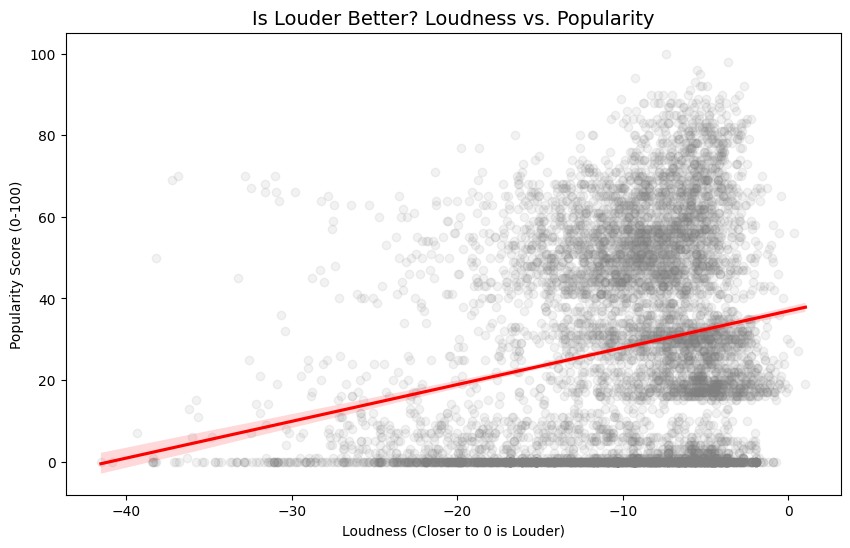

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# 'alpha=0.1' makes the dots transparent
sns.regplot(data=df, x='loudness', y='popularity',
            scatter_kws={'alpha': 0.1, 'color': 'gray'},
            line_kws={'color': 'red'})

plt.title("Is Louder Better? Loudness vs. Popularity", fontsize=14)
plt.xlabel("Loudness (Closer to 0 is Louder)")
plt.ylabel("Popularity Score (0-100)")
plt.show()

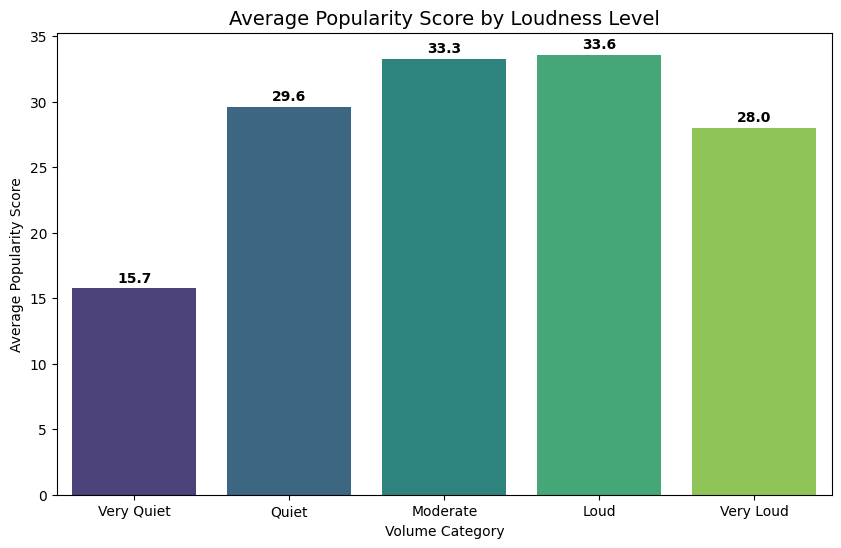

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bucket_summary, x='Loudness_Bucket', y='popularity', 
            hue='Loudness_Bucket', palette='viridis')


plt.title("Average Popularity Score by Loudness Level", fontsize=14)
plt.xlabel("Volume Category")
plt.ylabel("Average Popularity Score")

for i, val in enumerate(bucket_summary['popularity']):
    plt.text(i, val + 0.5, f'{val:.1f}', ha='center', fontweight='bold')
plt.show()

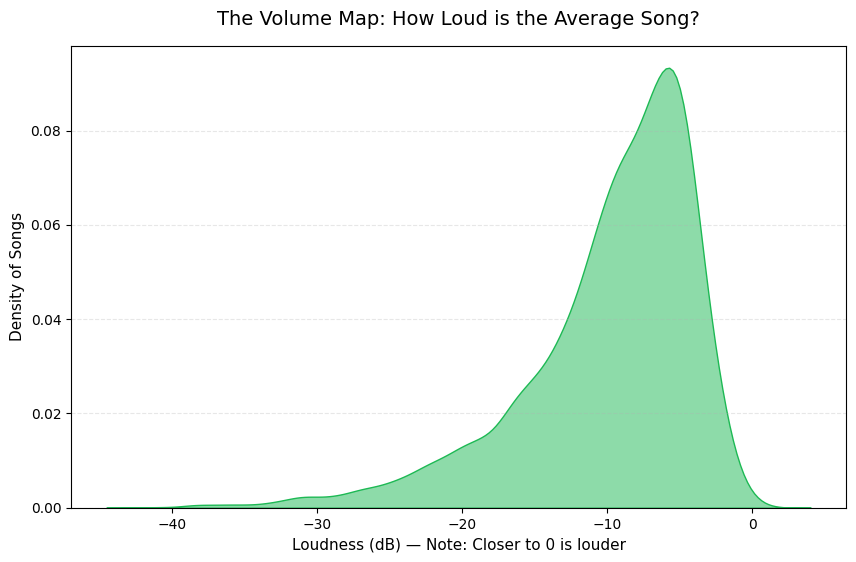

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tracks_cleaned.csv')

# --- The Volume Map(KDE) ---
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='loudness', fill=True, color='#1DB954', alpha=0.5)

plt.title("The Volume Map: How Loud is the Average Song?", fontsize=14, pad=15)
plt.xlabel("Loudness (dB) — Note: Closer to 0 is louder", fontsize=11)
plt.ylabel("Density of Songs", fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()